In [1]:
#importing libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
#loading data

fminst = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fminst.load_data()

In [3]:
train_images = X_train/255
test_images = y_test/255

In [4]:
print(X_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000,)


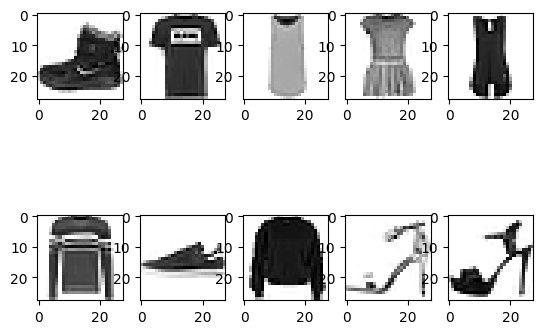

In [6]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    

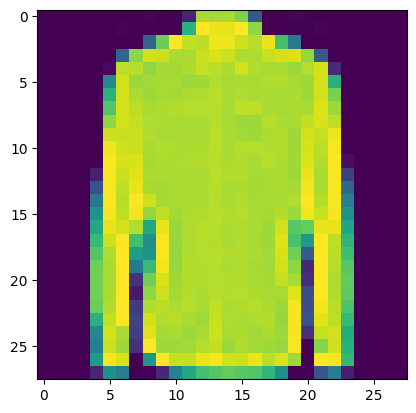

In [7]:
index=39
np.set_printoptions(linewidth=320)
plt.imshow(X_train[index])

In [8]:
#creating model

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [9]:
#compiling model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
#running the model
hs = model.fit(X_train,y_train, epochs=6,validation_data=(X_test,y_test))

Epoch 1/6
1875/1875 [==============================] - 14s 7ms/step - loss: 2.6493 - accuracy: 0.7004 - val_loss: 0.8422 - val_accuracy: 0.7173
Epoch 2/6
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6685 - accuracy: 0.7704 - val_loss: 0.6571 - val_accuracy: 0.7916
Epoch 3/6
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5821 - accuracy: 0.7970 - val_loss: 0.6108 - val_accuracy: 0.7933
Epoch 4/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5482 - accuracy: 0.8091 - val_loss: 0.5779 - val_accuracy: 0.8003
Epoch 5/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5099 - accuracy: 0.8248 - val_loss: 0.5521 - val_accuracy: 0.8127
Epoch 6/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5022 - accuracy: 0.8303 - val_loss: 0.5747 - val_accuracy: 0.8093


In [11]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.5747 - accuracy: 0.8093 - 820ms/epoch - 3ms/step


[0.5746968388557434, 0.8093000054359436]

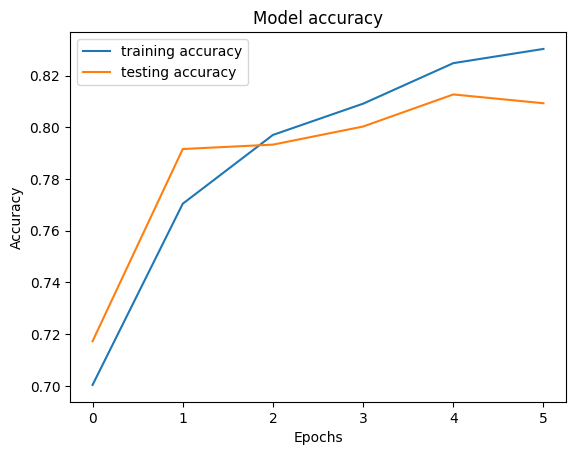

In [12]:
plt.plot(hs.history['accuracy'],label='training accuracy')
plt.plot(hs.history['val_accuracy'],label='testing accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

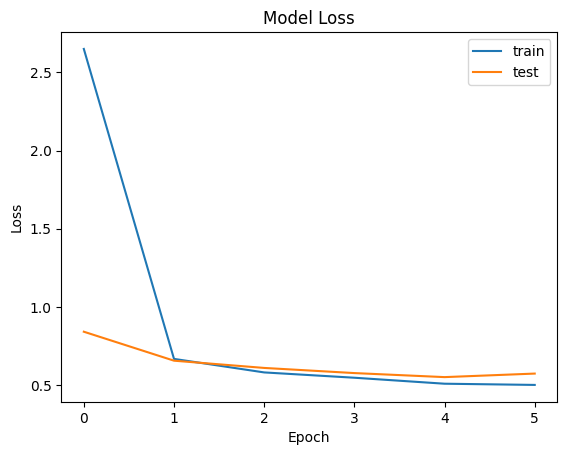

In [13]:
plt.plot(hs.history['loss'],label='train')
plt.plot(hs.history['val_loss'],label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()